In [1]:
# import packages we'll need
# if connecting from thalamege, use   Python 3.8.12 64-bit ('py38':conda)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import glob as glob
import seaborn as sns
import os
import re

# initialize data directory and other useful variables
dir_splits = os.getcwd().split("/")[:-2]
data_dir = os.path.join("/",*dir_splits)
data_dir = os.path.join(data_dir, "ThalHi_data", "v2_EEG_data")
dir_splits = os.getcwd().split("/")[:-1]
output_dir = os.path.join("/",*dir_splits)

os.chdir(data_dir)
print(data_dir)
print(output_dir)

/Volumes/rdss_kahwang/ThalHi_data/v2_EEG_data
/Volumes/rdss_kahwang/ThalHi_v2


In [2]:
# Load ouptut csv files for the two tasks and put each in their own respective master files (all subjects in long format)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# get list of files for each task
print(os.path.join(data_dir, ("sub-[0-9]*_task-ThalHiV2_block-00[0-7]_*.csv")))
ThalHi_output_list = glob.glob(os.path.join(data_dir, ("sub-[0-8]*_task-ThalHiV2_block-00[0-7]_*.csv")))
#print("ThalHi participant and block file list", ThalHi_output_list)
df_list = []
# switch_dict[retrocue][cur_cue][prev_cue]
switch_dict = { 'texture': { 'fsr': { 'fsr': 'Stay', 'fsb': 'Stay', 'far': 'IDS', 'fab': 'IDS', 'dsr': 'EDS', 'dsb': 'EDS', 'dab': 'EDS', 'dar': 'EDS', 'Task':'Scene' }, 
                            'fsb': { 'fsr': 'Stay', 'fsb': 'Stay', 'far': 'IDS', 'fab': 'IDS', 'dsr': 'EDS', 'dsb': 'EDS', 'dab': 'EDS', 'dar': 'EDS', 'Task':'Scene' }, 
                            'far': { 'fsr': 'IDS', 'fsb': 'IDS', 'far': 'Stay', 'fab': 'Stay', 'dsr': 'EDS', 'dsb': 'EDS', 'dab': 'EDS', 'dar': 'EDS', 'Task':'Face' }, 
                            'fab': { 'fsr': 'IDS', 'fsb': 'IDS', 'far': 'Stay', 'fab': 'Stay', 'dsr': 'EDS', 'dsb': 'EDS', 'dab': 'EDS', 'dar': 'EDS', 'Task':'Face' }, 
                            'dsr': { 'fsr': 'EDS', 'fsb': 'EDS', 'far': 'EDS', 'fab': 'EDS', 'dsr': 'Stay', 'dsb': 'IDS', 'dab': 'IDS', 'dar': 'Stay', 'Task':'Face' }, 
                            'dsb': { 'fsr': 'EDS', 'fsb': 'EDS', 'far': 'EDS', 'fab': 'EDS', 'dsr': 'IDS', 'dsb': 'Stay', 'dab': 'Stay', 'dar': 'IDS', 'Task':'Scene' }, 
                            'dab': { 'fsr': 'EDS', 'fsb': 'EDS', 'far': 'EDS', 'fab': 'EDS', 'dsr': 'IDS', 'dsb': 'Stay', 'dab': 'Stay', 'dar': 'IDS', 'Task':'Scene' }, 
                            'dar': { 'fsr': 'EDS', 'fsb': 'EDS', 'far': 'EDS', 'fab': 'EDS', 'dsr': 'Stay', 'dsb': 'IDS', 'dab': 'IDS', 'dar': 'Stay', 'Task':'Face' } }, 
                'shape': { 'fsr': { 'fsr': 'Stay', 'fsb': 'IDS', 'far': 'EDS', 'fab': 'EDS', 'dsr': 'Stay', 'dsb': 'IDS', 'dab': 'EDS', 'dar': 'EDS', 'Task':'Face' }, 
                           'fsb': { 'fsr': 'IDS', 'fsb': 'Stay', 'far': 'EDS', 'fab': 'EDS', 'dsr': 'IDS', 'dsb': 'Stay', 'dab': 'EDS', 'dar': 'EDS', 'Task':'Scene' }, 
                           'far': { 'fsr': 'EDS', 'fsb': 'EDS', 'far': 'Stay', 'fab': 'Stay', 'dsr': 'EDS', 'dsb': 'EDS', 'dab': 'IDS', 'dar': 'IDS', 'Task':'Face' }, 
                           'fab': { 'fsr': 'EDS', 'fsb': 'EDS', 'far': 'Stay', 'fab': 'Stay', 'dsr': 'EDS', 'dsb': 'EDS', 'dab': 'IDS', 'dar': 'IDS', 'Task':'Face' }, 
                           'dsr': { 'fsr': 'Stay', 'fsb': 'IDS', 'far': 'EDS', 'fab': 'EDS', 'dsr': 'Stay', 'dsb': 'IDS', 'dab': 'EDS', 'dar': 'EDS', 'Task':'Face' }, 
                           'dsb': { 'fsr': 'IDS', 'fsb': 'Stay', 'far': 'EDS', 'fab': 'EDS', 'dsr': 'IDS', 'dsb': 'Stay', 'dab': 'EDS', 'dar': 'EDS', 'Task':'Scene' }, 
                           'dab': { 'fsr': 'EDS', 'fsb': 'EDS', 'far': 'IDS', 'fab': 'IDS', 'dsr': 'EDS', 'dsb': 'EDS', 'dab': 'Stay', 'dar': 'Stay', 'Task':'Scene' }, 
                           'dar': { 'fsr': 'EDS', 'fsb': 'EDS', 'far': 'IDS', 'fab': 'IDS', 'dsr': 'EDS', 'dsb': 'EDS', 'dab': 'Stay', 'dar': 'Stay', 'Task':'Scene' } }, 
                'color': { 'fsr': { 'fsr': 'Stay', 'fsb': 'EDS', 'far': 'IDS', 'fab': 'EDS', 'dsr': 'Stay', 'dsb': 'EDS', 'dab': 'EDS', 'dar': 'IDS', 'Task':'Scene' }, 
                          'fsb': { 'fsr': 'EDS', 'fsb': 'Stay', 'far': 'EDS', 'fab': 'Stay', 'dsr': 'EDS', 'dsb': 'IDS', 'dab': 'IDS', 'dar': 'EDS', 'Task':'Face' }, 
                          'far': { 'fsr': 'IDS', 'fsb': 'EDS', 'far': 'Stay', 'fab': 'EDS', 'dsr': 'IDS', 'dsb': 'EDS', 'dab': 'EDS', 'dar': 'Stay', 'Task':'Face' }, 
                          'fab': { 'fsr': 'EDS', 'fsb': 'Stay', 'far': 'EDS', 'fab': 'Stay', 'dsr': 'EDS', 'dsb': 'IDS', 'dab': 'IDS', 'dar': 'EDS', 'Task':'Face' }, 
                          'dsr': { 'fsr': 'Stay', 'fsb': 'EDS', 'far': 'IDS', 'fab': 'EDS', 'dsr': 'Stay', 'dsb': 'EDS', 'dab': 'EDS', 'dar': 'IDS', 'Task':'Scene' }, 
                          'dsb': { 'fsr': 'EDS', 'fsb': 'IDS', 'far': 'EDS', 'fab': 'IDS', 'dsr': 'EDS', 'dsb': 'Stay', 'dab': 'Stay', 'dar': 'EDS', 'Task':'Scene' }, 
                          'dab': { 'fsr': 'EDS', 'fsb': 'IDS', 'far': 'EDS', 'fab': 'IDS', 'dsr': 'EDS', 'dsb': 'Stay', 'dab': 'Stay', 'dar': 'EDS', 'Task':'Scene' }, 
                          'dar': { 'fsr': 'IDS', 'fsb': 'EDS', 'far': 'Stay', 'fab': 'EDS', 'dsr': 'IDS', 'dsb': 'EDS', 'dab': 'EDS', 'dar': 'Stay', 'Task':'Face' } } } 

for cur in sorted(ThalHi_output_list):
    # -- load file
    temp_df = pd.read_csv(cur)
    # -- add switch information
    Trial_type_Correct = ['Other']
    # loop through all rows in the current subject df
    #print("number of rows:", len(temp_df))
    for cur_row in list(range(0,len(temp_df))):
        cur_cue = temp_df['cue'][cur_row]
        cur_retrocue = temp_df['retrocue'][cur_row]
        # if the row is from the first trial in the df, skip, otherwise continue
        if (cur_row > 0):
            prev_cue = temp_df['cue'][(cur_row-1)]
            if cur_retrocue == temp_df['retrocue'][(cur_row-1)]:
                if cur_cue == prev_cue:
                    Trial_type_Correct.append('Repeat')
                else:
                    # get trial type and version for lists
                    Trial_type_Correct.append(switch_dict[cur_retrocue][cur_cue][prev_cue])
            else:
                Trial_type_Correct.append('HDS')
    # add switch column to data frame
    temp_df['Switch_Type'] = Trial_type_Correct
    # add subject information
    sid=re.search("[0-9]{5}", cur)
    if sid:
        if int(sid.group(0)) == 10264:
            if temp_df['block'][0] == 2:
                temp_df.drop(range(33,72), inplace=True)
        elif int(sid.group(0)) == 10263:
            if temp_df['block'][0] == 3:
                temp_df.drop([0,1,2], inplace=True)
        temp_df["Participant_ID"] = sid.group(0)
    # add version info
    retrocues_used = temp_df['retrocue'].unique()
    if (("texture" in retrocues_used) & ("color" in retrocues_used)):
        temp_df['version'] = 'FC'
    elif (("texture" in retrocues_used) & ("shape" in retrocues_used)):
        temp_df['version'] = 'FS'
    elif (("shape" in retrocues_used) & ("color" in retrocues_used)):
        temp_df['version'] = 'SC'
    else:
        temp_df['version'] = 'ERROR'
    # add to df list
    df_list.append(temp_df)
ThalHi_df = pd.concat(df_list, ignore_index=True) # merge dfs in list

print("master data frames generated")
print(len(ThalHi_df.Participant_ID.unique()), "subjects completed the EEG task")

/Volumes/rdss_kahwang/ThalHi_data/v2_EEG_data/sub-[0-9]*_task-ThalHiV2_block-00[0-7]_*.csv
master data frames generated
6 subjects completed the EEG task


In [3]:
# remove no response rows (do not consider trials where no response was made)
ThalHi_df_all_trls = ThalHi_df.copy()
ThalHi_df = ThalHi_df[ThalHi_df['rt']>0]
# preview the data frame
ThalHi_df

,block,trial,delay,retro_freq,cue,texture,shape,color,retrocue,stimulus,image_filename,task,corr_resp,subj_resp,correct,rt,Switch_Type,Participant_ID,version
1,1.0,2.0,2.0,0.5,far,Filled,Asterisk,red,shape,Scene,scenes/Sc71.jpg,Face,2.0,2.0,1.0,0.720952,EDS,10106,SC
2,1.0,3.0,2.0,0.5,dab,Donut,Asterisk,blue,shape,Face,faces/214.jpg,Scene,2.0,2.0,1.0,0.764658,IDS,10106,SC
3,1.0,4.0,2.0,0.5,fsb,Filled,Star,blue,color,Face,faces/200.jpg,Face,1.0,2.0,0.0,1.120549,HDS,10106,SC
4,1.0,5.0,2.0,0.5,dsb,Donut,Star,blue,shape,Scene,scenes/62.jpg,Scene,1.0,1.0,1.0,0.992695,HDS,10106,SC
6,1.0,7.0,2.0,0.5,dsr,Donut,Star,red,color,Scene,scenes/Sc65.jpg,Scene,1.0,1.0,1.0,0.713121,IDS,10106,SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,7.0,68.0,2.0,0.5,dsr,Donut,Star,red,color,Face,faces/195.jpg,Scene,2.0,2.0,1.0,0.610701,EDS,10271,FC
2978,7.0,69.0,2.0,0.5,dsb,Donut,Star,blue,color,Scene,scenes/32.jpg,Scene,1.0,1.0,1.0,0.765298,EDS,10271,FC
2979,7.0,70.0,2.0,0.5,dsr,Donut,Star,red,texture,Scene,scenes/Sc139.jpg,Face,2.0,1.0,0.0,0.394595,HDS,10271,FC
2980,7.0,71.0,2.0,0.5,dab,Donut,Asterisk,blue,texture,Face,faces/138.jpg,Scene,2.0,2.0,1.0,0.490822,IDS,10271,FC


In [4]:
# Figure out which subjects need to be excluded due to low accuracy
#    - missed responses have already been removed
print("only considering trials with responses")
tmp_overall_acc = ThalHi_df[['Participant_ID','correct']].groupby(by="Participant_ID").mean().reset_index()
print(tmp_overall_acc)

print("\nconsidering missed trials as well")
tmp2_overall_acc = ThalHi_df_all_trls[['Participant_ID','correct']].groupby(by="Participant_ID").mean().reset_index()
print(tmp2_overall_acc)

# manually enter ids to exclude based on output to this cell
exclude_thresh = 0.65 # need 65% accuracy overall to be usable
pars_to_exclude = [] # will fill in based on predefined threshold
acc_list = list(tmp_overall_acc['correct'])
#print(acc_list)
for ind, subj in enumerate(list(tmp_overall_acc['Participant_ID'])):
    if acc_list[ind] < exclude_thresh:
        pars_to_exclude.append(int(subj))
print("subjects to exclude: ", pars_to_exclude)

only considering trials with responses
  Participant_ID   correct
0          10106  0.724000
1          10263  0.936128
2          10264  0.859914
3          10268  0.955556
4          10270  0.850202
5          10271  0.783567

considering missed trials as well
  Participant_ID   correct
0          10106  0.718254
1          10263  0.936128
2          10264  0.858065
3          10268  0.938492
4          10270  0.833333
5          10271  0.775794
subjects to exclude:  []



Plotting RTs and Accuracy for ALL subjects collected so far


<AxesSubplot:title={'center':'Accuracy (including missed trials)'}, xlabel='Participant_ID', ylabel='correct'>

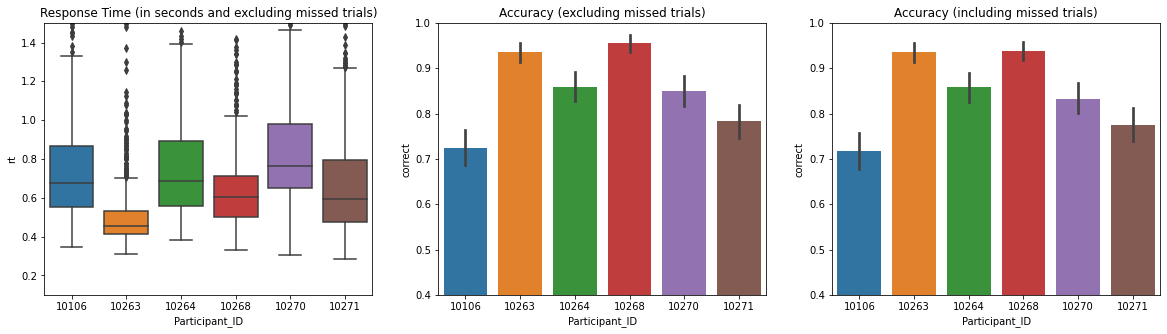

In [5]:
# plot out RTs and accuracy for ALL the subjects collected
plt.rcParams["figure.figsize"] = (20,5) # put two plots side by side
fig, axes = plt.subplots(1,3)
plot_order = ["Response Time (in seconds and excluding missed trials)", "Accuracy (excluding missed trials)", "Accuracy (including missed trials)"]
for ind, ax in enumerate(axes):
    if ind==0:
        ax.set_ylim(0.1,1.5)
    else:
        ax.set_ylim(0.4,1.00)
    ax.set_title(plot_order[ind])

print('\nPlotting RTs and Accuracy for ALL subjects collected so far')
sns.boxplot(  x="Participant_ID", y= "rt", data=ThalHi_df,  orient='v' , ax=axes[0])
sns.barplot(  x="Participant_ID", y= "correct", data=ThalHi_df,  orient='v' , ax=axes[1])
sns.barplot(  x="Participant_ID", y= "correct", data=ThalHi_df_all_trls,  orient='v' , ax=axes[2])


Plotting Switch type RTs and Accuracy (using ALL subjects collected so far)

	 there were  148  Repeat trials,  170  Stay trials,  396  IDS trials,  746  EDS trials, and  1453  HDS trials


<AxesSubplot:title={'center':'Accuracy (including missed trials)'}, xlabel='Switch_Type', ylabel='correct'>

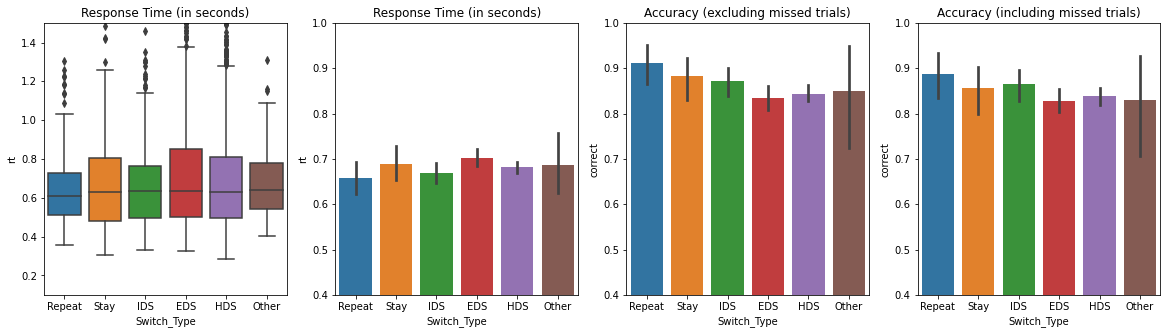

In [6]:
# plot out switch type RTs and Acc for ALL the subjects collected
plt.rcParams["figure.figsize"] = (20,5) # put two plots side by side
fig, axes = plt.subplots(1,4)
plot_order = ["Response Time (in seconds)", "Response Time (in seconds)", "Accuracy (excluding missed trials)", "Accuracy (including missed trials)"]
for ind, ax in enumerate(axes):
    if ind==0:
        ax.set_ylim(0.1,1.5)
    else:
        ax.set_ylim(0.4,1.00)
    ax.set_title(plot_order[ind])

print('\nPlotting Switch type RTs and Accuracy (using ALL subjects collected so far)')
print('\n\t there were ', len(ThalHi_df[ ThalHi_df['Switch_Type']=='Repeat' ]), ' Repeat trials, ', len(ThalHi_df[ ThalHi_df['Switch_Type']=='Stay' ]), ' Stay trials, ', len(ThalHi_df[ ThalHi_df['Switch_Type']=='IDS' ]), ' IDS trials, ', len(ThalHi_df[ ThalHi_df['Switch_Type']=='EDS' ]), ' EDS trials, and ', len(ThalHi_df[ ThalHi_df['Switch_Type']=='HDS' ]), ' HDS trials')
sns.boxplot(  x="Switch_Type", y= "rt", data=ThalHi_df,  orient='v' , ax=axes[0], order=['Repeat', 'Stay','IDS','EDS', 'HDS', 'Other'])
#sns.barplot(  x="Switch_Type", y= "rt", data=ThalHi_df,  orient='v' , ax=axes[1], order=['Repeat', 'Stay','IDS','EDS', 'HDS','Other'])
sns.barplot(  x="Switch_Type", y= "correct", data=ThalHi_df,  orient='v' , ax=axes[2], order=['Repeat', 'Stay','IDS','EDS', 'HDS','Other'])
sns.barplot(  x="Switch_Type", y= "correct", data=ThalHi_df_all_trls,  orient='v' , ax=axes[3], order=['Repeat', 'Stay','IDS','EDS', 'HDS','Other'])

---------------------------
---------------------------
Look at same data as above, but only use participants with usable BEHAVIORAL data
---------------------------
---------------------------

In [7]:
ThalHi_df_usable = ThalHi_df.copy()
ThalHi_df_all_trls_usable = ThalHi_df_all_trls.copy()

for par in ThalHi_df.Participant_ID.unique():
    if int(par) in pars_to_exclude:
        print("excluding par ", par)
        ThalHi_df_usable = ThalHi_df_usable[ThalHi_df_usable.Participant_ID!=par]
        ThalHi_df_all_trls_usable = ThalHi_df_all_trls_usable[ThalHi_df_all_trls_usable.Participant_ID!=par]

ThalHi_df_usable


Plotting RTs and Accuracy for USABLE subjects collected so far


<AxesSubplot:title={'center':'Accuracy (including missed trials)'}, xlabel='Participant_ID', ylabel='correct'>

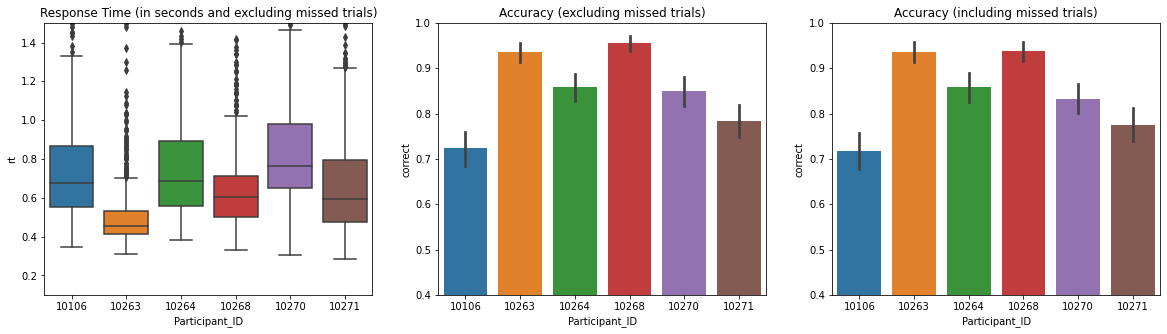

In [9]:
# plot out RTs and accuracy for the different delay conditions
plt.rcParams["figure.figsize"] = (20,5) # put two plots side by side
fig, axes = plt.subplots(1,3)
plot_order = ["Response Time (in seconds and excluding missed trials)", "Accuracy (excluding missed trials)", "Accuracy (including missed trials)"]
for ind, ax in enumerate(axes):
    if ind==0:
        ax.set_ylim(0.1,1.5)
    else:
        ax.set_ylim(0.4,1.00)
    ax.set_title(plot_order[ind])
    
print('\nPlotting RTs and Accuracy for USABLE BEHAVIORAL subjects collected so far')

sns.boxplot(  x="Participant_ID", y= "rt", data=ThalHi_df_usable,  orient='v' , ax=axes[0])
sns.barplot(  x="Participant_ID", y= "correct", data=ThalHi_df_usable,  orient='v' , ax=axes[1])
sns.barplot(  x="Participant_ID", y= "correct", data=ThalHi_df_all_trls_usable,  orient='v' , ax=axes[2])


Plotting Switch type RTs and Accuracy (using USABLE subjects collected so far)

	 there were  148  Repeat trials,  170  Stay trials,  396  IDS trials,  746  EDS trials, and  1453  HDS trials


<AxesSubplot:title={'center':'Accuracy (including missed trials)'}, xlabel='Switch_Type', ylabel='correct'>

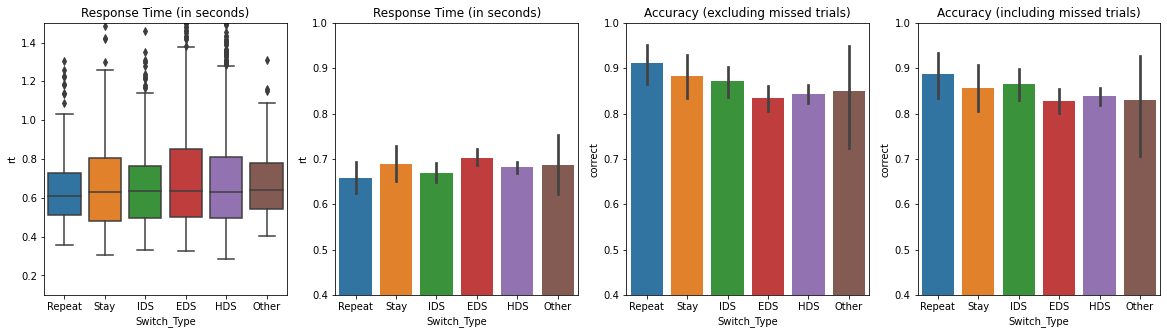

In [10]:
# plot out switch type RTs and Acc for ALL the subjects collected
plt.rcParams["figure.figsize"] = (20,5) # put two plots side by side
fig, axes = plt.subplots(1,4)
plot_order = ["Response Time (in seconds)", "Response Time (in seconds)", "Accuracy (excluding missed trials)", "Accuracy (including missed trials)"]
for ind, ax in enumerate(axes):
    if ind==0:
        ax.set_ylim(0.1,1.5)
    else:
        ax.set_ylim(0.4,1.00)
    ax.set_title(plot_order[ind])

print('\nPlotting Switch type RTs and Accuracy (using USABLE BEHAVIORAL subjects collected so far)')
print('\n\t there were ', len(ThalHi_df_usable[ ThalHi_df_usable['Switch_Type']=='Repeat' ]), ' Repeat trials, ', len(ThalHi_df_usable[ ThalHi_df_usable['Switch_Type']=='Stay' ]), ' Stay trials, ', len(ThalHi_df_usable[ ThalHi_df_usable['Switch_Type']=='IDS' ]), ' IDS trials, ', len(ThalHi_df_usable[ ThalHi_df_usable['Switch_Type']=='EDS' ]), ' EDS trials, and ', len(ThalHi_df_usable[ ThalHi_df_usable['Switch_Type']=='HDS' ]), ' HDS trials')
sns.boxplot(  x="Switch_Type", y= "rt", data=ThalHi_df_usable,  orient='v' , ax=axes[0], order=['Repeat', 'Stay','IDS','EDS', 'HDS', 'Other'])
sns.barplot(  x="Switch_Type", y= "rt", data=ThalHi_df_usable,  orient='v' , ax=axes[1], order=['Repeat', 'Stay','IDS','EDS', 'HDS','Other'])
sns.barplot(  x="Switch_Type", y= "correct", data=ThalHi_df_usable,  orient='v' , ax=axes[2], order=['Repeat', 'Stay','IDS','EDS', 'HDS','Other'])
sns.barplot(  x="Switch_Type", y= "correct", data=ThalHi_df_all_trls_usable,  orient='v' , ax=axes[3], order=['Repeat', 'Stay','IDS','EDS', 'HDS','Other'])


Plotting CUE RTs and Accuracy (using USABLE subjects collected so far)


<AxesSubplot:title={'center':'Accuracy (including missed trials)'}, xlabel='cue', ylabel='correct'>

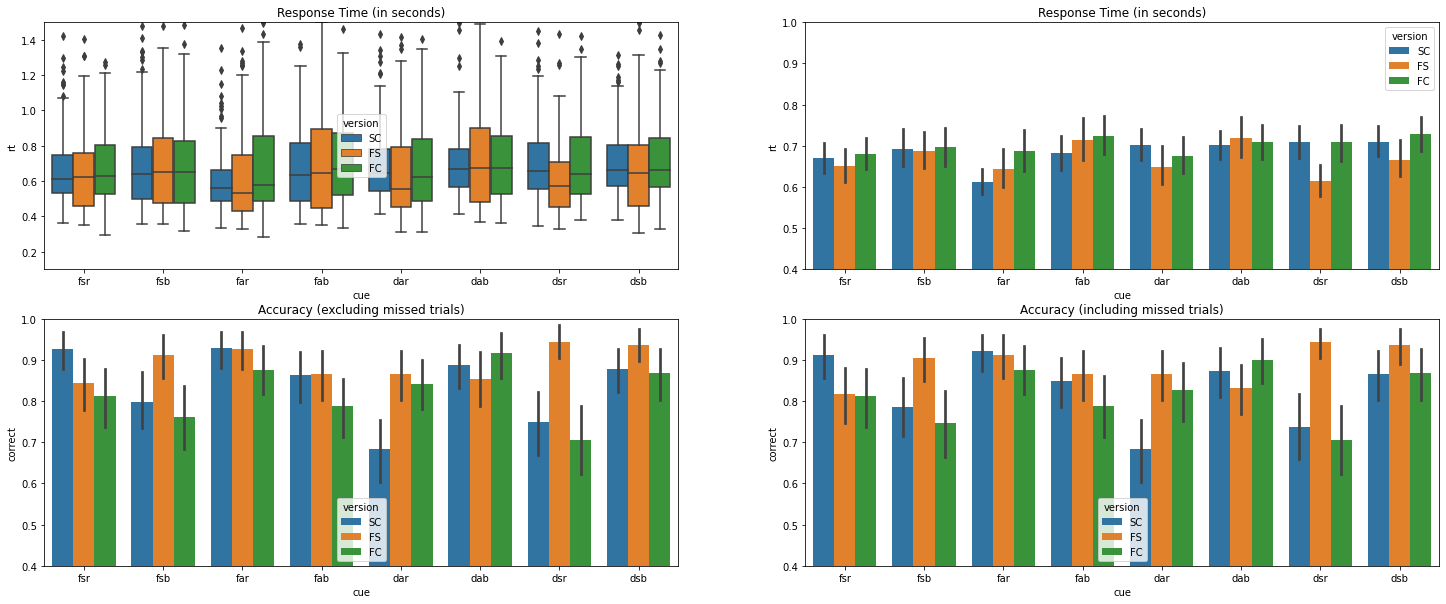

In [11]:
# plot out switch type RTs and Acc for ALL the subjects collected
plt.rcParams["figure.figsize"] = (25,10) # put two plots side by side
fig, axes = plt.subplots(2,2)
plot_order = ["Response Time (in seconds)", "Response Time (in seconds)", "Accuracy (excluding missed trials)", "Accuracy (including missed trials)"]
for ind, ax in enumerate(axes.flatten()):
    if ind==0:
        ax.set_ylim(0.1,1.5)
    else:
        ax.set_ylim(0.4,1.00)
    ax.set_title(plot_order[ind])

cue_order = ['fsr','fsb','far','fab','dar','dab','dsr','dsb']
print('\nPlotting CUE RTs and Accuracy (using USABLE BEHAVIORAL subjects collected so far)')

sns.boxplot(  x="cue", y= "rt", hue="version", data=ThalHi_df_usable,  orient='v' , ax=axes[0][0], order=cue_order)
sns.barplot(  x="cue", y= "rt", hue="version", data=ThalHi_df_usable,  orient='v' , ax=axes[0][1], order=cue_order)
sns.barplot(  x="cue", y= "correct", hue="version", data=ThalHi_df_usable,  orient='v' , ax=axes[1][0], order=cue_order)
sns.barplot(  x="cue", y= "correct", hue="version", data=ThalHi_df_all_trls_usable,  orient='v' , ax=axes[1][1], order=cue_order)


Plotting CUE RTs and Accuracy (using USABLE subjects collected so far)


<AxesSubplot:title={'center':'Accuracy (including missed trials)'}, xlabel='version', ylabel='correct'>

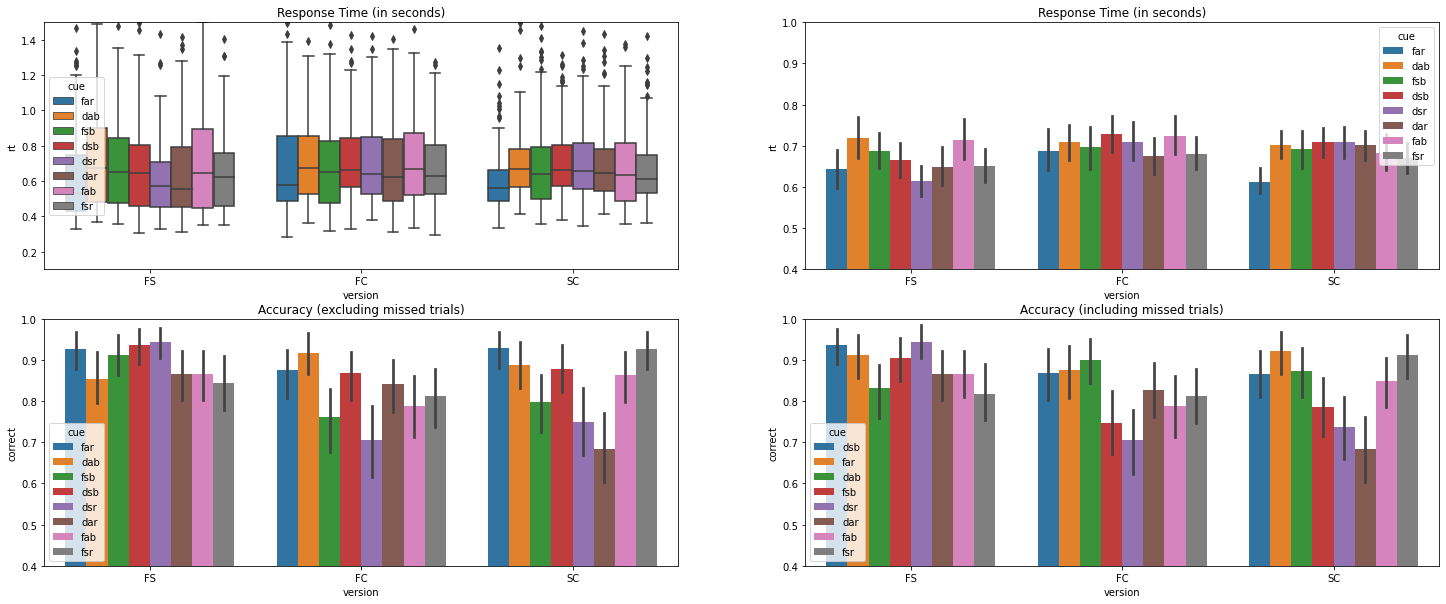

In [12]:
# plot out switch type RTs and Acc for ALL the subjects collected
plt.rcParams["figure.figsize"] = (25,10) # put two plots side by side
fig, axes = plt.subplots(2,2)
plot_order = ["Response Time (in seconds)", "Response Time (in seconds)", "Accuracy (excluding missed trials)", "Accuracy (including missed trials)"]
for ind, ax in enumerate(axes.flatten()):
    if ind==0:
        ax.set_ylim(0.1,1.5)
    else:
        ax.set_ylim(0.4,1.00)
    ax.set_title(plot_order[ind])

cue_order = ['FS','FC','SC']
print('\nPlotting CUE RTs and Accuracy (using USABLE BEHAVIORAL subjects collected so far)')

sns.boxplot(  x="version", y= "rt", hue="cue", data=ThalHi_df_usable,  orient='v' , ax=axes[0][0], order=cue_order)
sns.barplot(  x="version", y= "rt", hue="cue", data=ThalHi_df_usable,  orient='v' , ax=axes[0][1], order=cue_order)
sns.barplot(  x="version", y= "correct", hue="cue", data=ThalHi_df_usable,  orient='v' , ax=axes[1][0], order=cue_order)
sns.barplot(  x="version", y= "correct", hue="cue", data=ThalHi_df_all_trls_usable,  orient='v' , ax=axes[1][1], order=cue_order)

---------------------------
---------------------------
Look at same data as above, but only use participants with usable EEG data
---------------------------
---------------------------

In [14]:
# Code to grab the google sheets we use for preprocessing
#sheet_id = "11rO6dkHLaQQfdvou_NVpZWFdHH-QyqJBc_UyWJz3fM4"
sheet_name = "Preprocessing"
#url = f”https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
url = f"https://docs.google.com/spreadsheets/d/11rO6dkHLaQQfdvou_NVpZWFdHH-QyqJBc_UyWJz3fM4/gviz/tq?tqx=out:csv&sheet={sheet_name}"

prepro_df = pd.read_csv(url)
prepro_df # check that it loaded properly by viewing

,Subject_ID,Session_Date,General_Electrode_Setup_Bad_Electrodes,Data Collection Notes Block_1_bad_chans,Block_2_bad_chans,Block_3_bad_chans,Block_4_bad_chans,Block_5_bad_chans,Block_6_bad_chans,Block_7_bad_chans,Preprocessing Preprocessed_By,Channels_Interpolated_Initially,Channels_Interpolated_pre-Epoching,Preprocessed_Date,Stim_ERP_Quality,Preprocessing Notes,Usable,Unnamed: 17
0,12345.0,9/3/2022,"FP2, PO3, T7","PO3, T7","PO3, T7","PO3, T7, C5","PO3, T7","PO3, T7","PO3, T7, T8","PO3, T7",Steph,PO3 T7,none,9/15/2022,good,had to remove ~50% of epochs due to drift,0.0,NaN
1,10106.0,9/8/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neha,NaN,NaN,9/22/2022,good,had to annotate large chunks of data as bad in...,1.0,NaN
2,10263.0,9/10/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steph,T8,NaN,9/16/2022,OK,only used blocks 3-7 for analyses and had to r...,0.0,NaN
3,10264.0,9/12/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hannah,T8 FT7 T7,TP8,9/23/22,good,NaN,1.0,NaN
4,10268.0,9/16/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chen-You,AF8 AF7 P9,P7 P10 F7,9/24/22,Bad,"marked AF8, AF7, and P9 for interpolation. Thr...",0.0,NaN
5,10270.0,9/22/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hannah,NaN,NaN,NaN,NaN,BRIDGING,0.0,NaN
6,10271.0,9/23/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,9/23/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# manually enter ids to exclude based on output to this cell
eeg_pars_to_exclude = [] # will fill in based on predefined threshold
usable_list = list(prepro_df['Usable'])
print(usable_list)
for ind, subj in enumerate(list(prepro_df['Subject_ID'])):
    if usable_list[ind] < 1:
        eeg_pars_to_exclude.append(int(subj))
print("subjects to exclude: ", eeg_pars_to_exclude)

ThalHi_df_eeg_usable = ThalHi_df_usable.copy()
ThalHi_df_all_trls_eeg_usable = ThalHi_df_all_trls_usable.copy()

for par in ThalHi_df.Participant_ID.unique():
    if int(par) in eeg_pars_to_exclude:
        print("excluding par ", par)
        ThalHi_df_eeg_usable = ThalHi_df_eeg_usable[ThalHi_df_eeg_usable.Participant_ID!=par]
        ThalHi_df_all_trls_eeg_usable = ThalHi_df_all_trls_eeg_usable[ThalHi_df_all_trls_eeg_usable.Participant_ID!=par]

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, nan, nan]
subjects to exclude:  [12345, 10263, 10268, 10270]
excluding par  10263
excluding par  10268
excluding par  10270



Plotting RTs and Accuracy for USABLE subjects collected so far


<AxesSubplot:title={'center':'Accuracy (including missed trials)'}, xlabel='Participant_ID', ylabel='correct'>

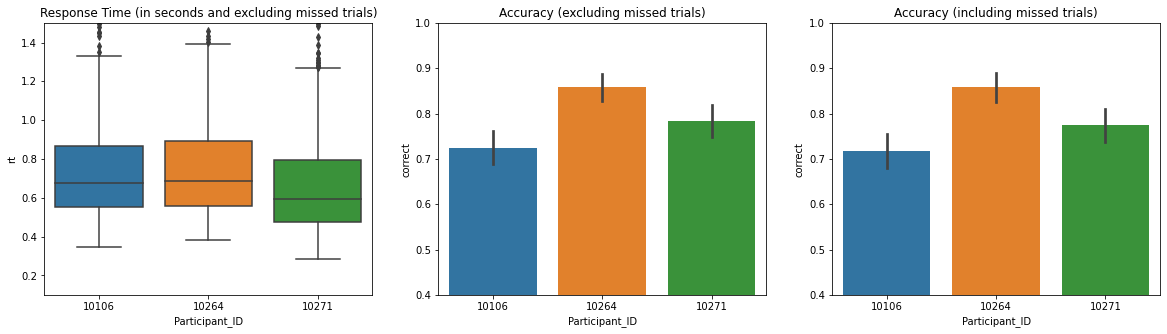

In [18]:
# plot out RTs and accuracy for the different delay conditions
plt.rcParams["figure.figsize"] = (20,5) # put two plots side by side
fig, axes = plt.subplots(1,3)
plot_order = ["Response Time (in seconds and excluding missed trials)", "Accuracy (excluding missed trials)", "Accuracy (including missed trials)"]
for ind, ax in enumerate(axes):
    if ind==0:
        ax.set_ylim(0.1,1.5)
    else:
        ax.set_ylim(0.4,1.00)
    ax.set_title(plot_order[ind])
    
print('\nPlotting RTs and Accuracy for USABLE EEG subjects collected so far')

sns.boxplot(  x="Participant_ID", y= "rt", data=ThalHi_df_eeg_usable,  orient='v' , ax=axes[0])
sns.barplot(  x="Participant_ID", y= "correct", data=ThalHi_df_eeg_usable,  orient='v' , ax=axes[1])
sns.barplot(  x="Participant_ID", y= "correct", data=ThalHi_df_all_trls_eeg_usable,  orient='v' , ax=axes[2])


Plotting Switch type RTs and Accuracy (using USABLE subjects collected so far)

	 there were  63  Repeat trials,  70  Stay trials,  198  IDS trials,  401  EDS trials, and  711  HDS trials


<AxesSubplot:title={'center':'Accuracy (including missed trials)'}, xlabel='Switch_Type', ylabel='correct'>

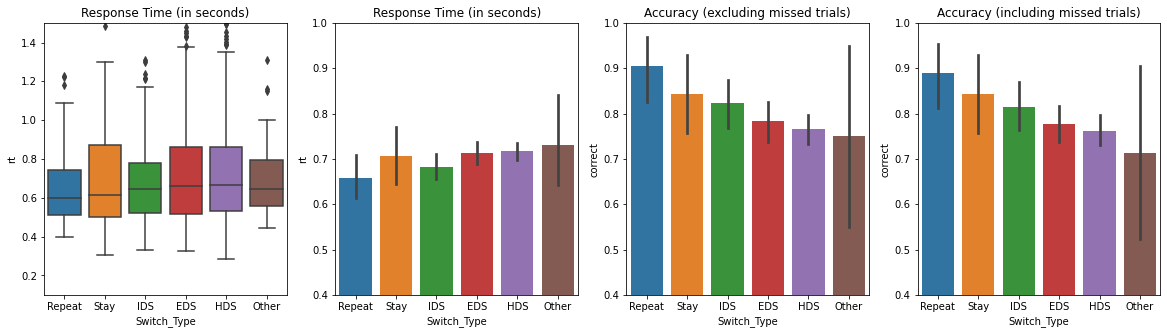

In [17]:
# plot out switch type RTs and Acc for ALL the subjects collected
plt.rcParams["figure.figsize"] = (20,5) # put two plots side by side
fig, axes = plt.subplots(1,4)
plot_order = ["Response Time (in seconds)", "Response Time (in seconds)", "Accuracy (excluding missed trials)", "Accuracy (including missed trials)"]
for ind, ax in enumerate(axes):
    if ind==0:
        ax.set_ylim(0.1,1.5)
    else:
        ax.set_ylim(0.4,1.00)
    ax.set_title(plot_order[ind])

print('\nPlotting Switch type RTs and Accuracy (using USABLE EEG subjects collected so far)')
print('\n\t there were ', len(ThalHi_df_eeg_usable[ ThalHi_df_eeg_usable['Switch_Type']=='Repeat' ]), ' Repeat trials, ', len(ThalHi_df_eeg_usable[ ThalHi_df_eeg_usable['Switch_Type']=='Stay' ]), ' Stay trials, ', len(ThalHi_df_eeg_usable[ ThalHi_df_eeg_usable['Switch_Type']=='IDS' ]), ' IDS trials, ', len(ThalHi_df_eeg_usable[ ThalHi_df_eeg_usable['Switch_Type']=='EDS' ]), ' EDS trials, and ', len(ThalHi_df_eeg_usable[ ThalHi_df_eeg_usable['Switch_Type']=='HDS' ]), ' HDS trials')
sns.boxplot(  x="Switch_Type", y= "rt", data=ThalHi_df_eeg_usable,  orient='v' , ax=axes[0], order=['Repeat', 'Stay','IDS','EDS', 'HDS', 'Other'])
sns.barplot(  x="Switch_Type", y= "rt", data=ThalHi_df_eeg_usable,  orient='v' , ax=axes[1], order=['Repeat', 'Stay','IDS','EDS', 'HDS','Other'])
sns.barplot(  x="Switch_Type", y= "correct", data=ThalHi_df_eeg_usable,  orient='v' , ax=axes[2], order=['Repeat', 'Stay','IDS','EDS', 'HDS','Other'])
sns.barplot(  x="Switch_Type", y= "correct", data=ThalHi_df_all_trls_eeg_usable,  orient='v' , ax=axes[3], order=['Repeat', 'Stay','IDS','EDS', 'HDS','Other'])